In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-data/iris_data.csv


# **# random in pandas**

In [4]:
path = "/kaggle/input/iris-data"
mydataset = pd.read_csv("/kaggle/input/iris-data/iris_data.csv")

In [5]:
mydataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
type(mydataset)
mydataset.shape
row = mydataset.shape[0]
col = mydataset.shape[1]
print(f"row = {row} and column = {col}")

row = 150 and column = 5


In [7]:
x = mydataset.columns
type(x)
print(x)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [8]:
for y in x:
    print(f"{y} = {mydataset[y].dtype}")

sepal_length = float64
sepal_width = float64
petal_length = float64
petal_width = float64
species = object


In [9]:
#if i use just numbers
print(mydataset.iloc[5:11,0:3])

    sepal_length  sepal_width  petal_length
5            5.4          3.9           1.7
6            4.6          3.4           1.4
7            5.0          3.4           1.5
8            4.4          2.9           1.4
9            4.9          3.1           1.5
10           5.4          3.7           1.5


In [10]:
#loc for name
print(mydataset.loc[5:11,["sepal_length","species"]])

    sepal_length species
5            5.4  setosa
6            4.6  setosa
7            5.0  setosa
8            4.4  setosa
9            4.9  setosa
10           5.4  setosa
11           4.8  setosa


# **if i change any value of any cells**

In [11]:
mydataset.iloc[1,0] = 5.9
mydataset.iloc[1,0]
mydataset.head()




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,5.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
#again chaging
mydataset.iloc[1,0] = 4.9
mydataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Value counts in a column**

In [21]:
x = mydataset.iloc[:,4].value_counts()
type(x)
print(x)


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [24]:
mydataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# **mean median and many more using describe **

In [31]:
x = mean_sepal_len = mydataset["sepal_length"].mean()
y = median_sepal_len = mydataset["sepal_length"].median()
print(f"x = {x:.2f} and y = {y}")

x = 5.84 and y = 5.8


In [40]:
sl = mydataset["sepal_length"].describe()
type(sl)
sl.shape
print(sl)


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64


# **50% quantile is the median , so changing the name**

In [42]:
# 50% quantile is the median , so changing the name

sl.rename({"50%" : "median"}, inplace = True)


In [43]:
sl

count     150.000000
mean        5.843333
std         0.828066
min         4.300000
25%         5.100000
median      5.800000
75%         6.400000
max         7.900000
Name: sepal_length, dtype: float64

# **if i add new row called range , max - min**

In [44]:
#just directly declaring a name called range
sl.loc["range"] = sl.loc["max"] - sl.loc["min"]

In [45]:
sl

count     150.000000
mean        5.843333
std         0.828066
min         4.300000
25%         5.100000
median      5.800000
75%         6.400000
max         7.900000
range       3.600000
Name: sepal_length, dtype: float64

# **Calculate the following for each species in a separate dataframe:
# The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
# The median of each of these measurements.**

In [48]:
mydataset.groupby("species").mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [49]:
mydataset.groupby("species").median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


# **Make a scatter plot of sepal_length vs sepal_width using Matplotlib. Label the axes and give the plot a title.**

In [50]:
import matplotlib.pyplot as plt

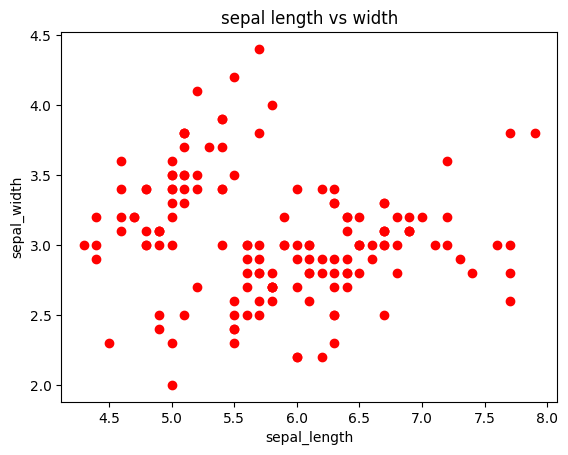

In [55]:
plt.scatter(mydataset["sepal_length"],mydataset["sepal_width"],color = "red")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("sepal length vs width")
plt.show()

# **Make a histogram of any one of the four features. Label axes and title it as appropriate.**

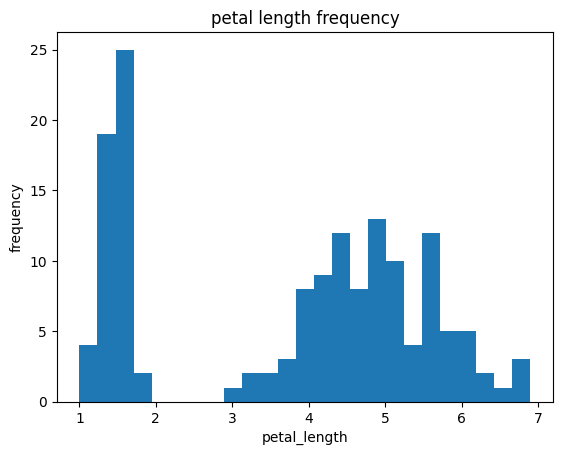

In [63]:
plt.hist(mydataset["petal_length"], bins = 25)
plt.xlabel("petal_length")
plt.ylabel("frequency")
plt.title("petal length frequency")
plt.show()